Logan Lasiter
RedID: 820065721


Writeup

I played around with many different versions of the values and found that using a faster learning rate with more iterations provided the most effective learning model. I was able to get down to a .1 error rate compared to the slower learning rate methods with less iterations which gave a .2+ error rate. It also looked like after 10000 iterations the results were very stabilized so I lowered the max iterations to 1000 for the first two examples and 10000 for the third, but with the fast learning rate the for loop broke before reaching it.  I decided to change the numpy array for possible amounts of the units as well because too often it was setting all three unit amounts at 0 and causing the for loop to break. At first I thought we were not supposed to be using the features to affect the outputs and therefore was not getting meaningful results but once I added in the features I found the converging results and was able to get good error rates although not perfect it could predict one in ten meals.



iteration:0, delta:80
iteration:1, delta:85.04000000000002
iteration:2, delta:65.32400000000001
iteration:3, delta:28.054711999999995
iteration:4, delta:39.35512812799999
iteration:5, delta:46.91018858975997
iteration:6, delta:51.51351151961029
iteration:7, delta:35.46523949797563
iteration:8, delta:32.74642549384919
iteration:9, delta:20.442134683002337
iteration:10, delta:24.845585943660637
iteration:11, delta:16.90759513206075
iteration:12, delta:18.391569239388502
iteration:13, delta:18.845587779952552
iteration:14, delta:14.819721041593652
iteration:15, delta:4.141573293831641
iteration:16, delta:21.03681025948805
iteration:17, delta:4.597225715167895
iteration:18, delta:9.912578040939707
iteration:19, delta:6.961194529110031
iteration:20, delta:8.09746878005302
iteration:21, delta:9.756853658651153
iteration:22, delta:2.883108164458264
iteration:23, delta:8.096546069742885
iteration:24, delta:8.136493974905079
iteration:25, delta:4.652626884210747
iteration:26, delta:0.3239295792

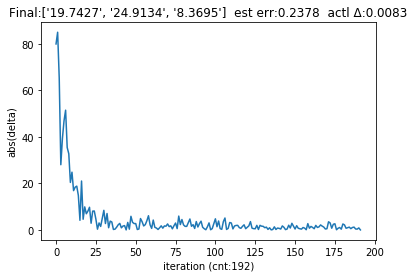

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 

# Starting codes for the HA2 of CS596

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# Ground-truth Cashier 
groundUnitPrice = np.array([20, 25, 8]) # for fish, chip, and ketchup, respectively

# step 1: initialize your guess on the unit prices of fish, chip and ketchup.
estimatedUnitPrice = np.array([15,20,5]) # initial unit prices.
#MAX_POSSIBLE_UNIT_PRICE = 50
#estimatedUnitPrice = np.random.randint(MAX_POSSIBLE_UNIT_PRICE, size=3) # choose random initial guesses

#PLACEHOLDER_1#start: set your own stopping conditions and learning rate
#condition 1: maximal iterations, stop.
MAX_ITERATION = 10000
#condition 2: if the difference between your prediction and the cashier's price is smaller than a threshold, stop. 
MIN_DELTA = .01
# learning rate
ALPHA = .001#1e-3
#PLACEHOLDER_1#end

# Y coordinates for plotting
deltaHistory = []


# step 2: iterative method
for i in range(0, MAX_ITERATION):
    # order a meal (simulating training data)
    randomMealPortions = np.random.randint(1, high=10, size=3)

    # calculate the estimated price     
    expectedTotalPrice = np.sum(estimatedUnitPrice * randomMealPortions)

    # calculate cashier/true price;     
    cashierPrice = np.sum(groundUnitPrice * randomMealPortions)

    # PLACEHOLDER_2 start
    
    # calculate current error
    delta = expectedTotalPrice - cashierPrice;

    # append iterError to the history array
    deltaHistory.append(abs(delta))

    #update unit prices
    estimatedUnitPrice = estimatedUnitPrice - (ALPHA * delta * randomMealPortions)

    # PLACEHOLDER_2 end
    
    #check stop conditions
    if abs(delta) < MIN_DELTA:
        break

    print('iteration:{}, delta:{}'.format(i, abs(delta)))


# step 3: evaluation
error = np.mean(abs(estimatedUnitPrice - groundUnitPrice))
print('estimation error:{}'.format(error))

# visualize convergence curve: error v.s. iterations

plt.plot(range(0, len(deltaHistory)), deltaHistory)
plt.xlabel('iteration (cnt:{})'.format(len(deltaHistory)))
plt.ylabel('abs(delta)')
plt.title('Final:{}  est err:{}  actl Δ:{}'.format([ '%.4f' % elem for elem in estimatedUnitPrice ], round(error, 4), round(delta, 4)))
plt.show()




iteration:0, delta:129
iteration:1, delta:86.131
iteration:2, delta:100.218603
iteration:3, delta:31.34858145300001
iteration:4, delta:73.57023617505098
iteration:5, delta:57.27092627079196
iteration:6, delta:78.9299360342809
iteration:7, delta:76.68779632529561
iteration:8, delta:87.26447323165894
iteration:9, delta:82.81320062719121
iteration:10, delta:72.24082108700696
iteration:11, delta:5.272817243753252
iteration:12, delta:61.268464363429985
iteration:13, delta:19.624121105833524
iteration:14, delta:52.68334633443078
iteration:15, delta:53.077555078600426
iteration:16, delta:28.846663266180002
iteration:17, delta:40.96770810183716
iteration:18, delta:33.12502760488758
iteration:19, delta:22.551669216170822
iteration:20, delta:4.745798267887324
iteration:21, delta:8.583920555509678
iteration:22, delta:9.194745708398528
iteration:23, delta:17.87534924695842
iteration:24, delta:15.453104693579945
iteration:25, delta:62.45230671860861
iteration:26, delta:23.822178151868542
iteration:

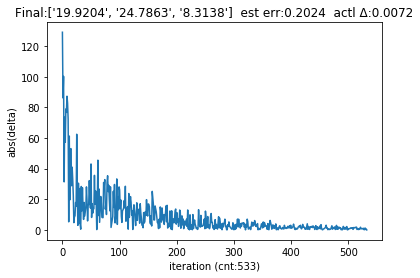

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 

# Starting codes for the HA2 of CS596

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# Ground-truth Cashier 
groundUnitPrice = np.array([20, 25, 8]) # for fish, chip, and ketchup, respectively

# step 1: initialize your guess on the unit prices of fish, chip and ketchup.
estimatedUnitPrice = np.array([10,12,10]) # initial unit prices.
#MAX_POSSIBLE_UNIT_PRICE = 50
#estimatedUnitPrice = np.random.randint(MAX_POSSIBLE_UNIT_PRICE, size=3) # choose random initial guesses

#PLACEHOLDER_1#start: set your own stopping conditions and learning rate
#condition 1: maximal iterations, stop.
MAX_ITERATION = 1000
#condition 2: if the difference between your prediction and the cashier's price is smaller than a threshold, stop. 
MIN_DELTA = .01
# learning rate
ALPHA = .001#1e-3
#PLACEHOLDER_1#end

# Y coordinates for plotting
deltaHistory = []


# step 2: iterative method
for i in range(0, MAX_ITERATION):
    # order a meal (simulating training data)
    randomMealPortions = np.random.randint(1, high=10, size=3)

    # calculate the estimated price     
    expectedTotalPrice = np.sum(estimatedUnitPrice * randomMealPortions )

    # calculate cashier/true price;     
    cashierPrice = np.sum(groundUnitPrice * randomMealPortions)

    # PLACEHOLDER_2 start
    
    # calculate current error
    delta = expectedTotalPrice - cashierPrice;

    # append iterError to the history array
    deltaHistory.append(abs(delta))

    #update unit prices
    estimatedUnitPrice = estimatedUnitPrice - (ALPHA * delta * randomMealPortions)

    # PLACEHOLDER_2 end
    
    #check stop conditions
    if abs(delta) < MIN_DELTA:
        break

    print('iteration:{}, delta:{}'.format(i, abs(delta)))


# step 3: evaluation
error = np.mean(abs(estimatedUnitPrice - groundUnitPrice))
print('estimation error:{}'.format(error))

# visualize convergence curve: error v.s. iterations

plt.plot(range(0, len(deltaHistory)), deltaHistory)
plt.xlabel('iteration (cnt:{})'.format(len(deltaHistory)))
plt.ylabel('abs(delta)')
plt.title('Final:{}  est err:{}  actl Δ:{}'.format([ '%.4f' % elem for elem in estimatedUnitPrice ], round(error, 4), round(delta, 4)))
plt.show()


iteration:0, delta:109
iteration:1, delta:58.25999999999999
iteration:2, delta:38.16759999999999
iteration:3, delta:18.404696
iteration:4, delta:13.919689040000009
iteration:5, delta:7.239247007199992
iteration:6, delta:0.6197153963519781
iteration:7, delta:2.9849155290662424
iteration:8, delta:16.30823064832839
iteration:9, delta:16.49866429405114
iteration:10, delta:2.5471054929106742
iteration:11, delta:2.933362986442944
iteration:12, delta:0.41296277815746407
iteration:13, delta:10.250423365791903
iteration:14, delta:6.65144417910011
iteration:15, delta:1.9845835721567937
iteration:16, delta:7.10970140302706
iteration:17, delta:1.6868187768360485
iteration:18, delta:1.7217139786367852
iteration:19, delta:4.441687158325124
iteration:20, delta:1.4991522806681417
iteration:21, delta:1.62702340729129
iteration:22, delta:3.039146564575617
iteration:23, delta:1.2082481211801905
iteration:24, delta:3.7685609638632513
iteration:25, delta:2.7573417226920753
iteration:26, delta:2.52682850308

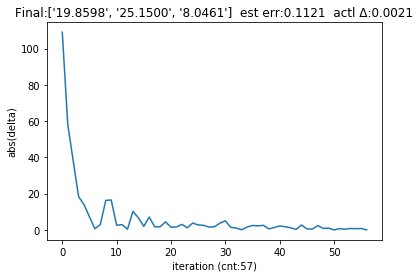

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 

# Starting codes for the HA2 of CS596

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# Ground-truth Cashier 
groundUnitPrice = np.array([20, 25, 8]) # for fish, chip, and ketchup, respectively

# step 1: initialize your guess on the unit prices of fish, chip and ketchup.
estimatedUnitPrice = np.array([14,12,6]) # initial unit prices.
#MAX_POSSIBLE_UNIT_PRICE = 50
#estimatedUnitPrice = np.random.randint(MAX_POSSIBLE_UNIT_PRICE, size=3) # choose random initial guesses

#PLACEHOLDER_1#start: set your own stopping conditions and learning rate
#condition 1: maximal iterations, stop.
MAX_ITERATION = 10000
#condition 2: if the difference between your prediction and the cashier's price is smaller than a threshold, stop. 
MIN_DELTA = .01
# learning rate
ALPHA = .01#1e-3
#PLACEHOLDER_1#end

# Y coordinates for plotting
deltaHistory = []


# step 2: iterative method
for i in range(0, MAX_ITERATION):
    # order a meal (simulating training data)
    randomMealPortions = np.random.randint(1, high=10, size=3)

    # calculate the estimated price     
    expectedTotalPrice = np.sum(estimatedUnitPrice * randomMealPortions )

    # calculate cashier/true price;     
    cashierPrice = np.sum(groundUnitPrice * randomMealPortions)

    # PLACEHOLDER_2 start
    
    # calculate current error
    delta = expectedTotalPrice - cashierPrice;

    # append iterError to the history array
    deltaHistory.append(abs(delta))

    #update unit prices
    estimatedUnitPrice = estimatedUnitPrice - (ALPHA * delta * randomMealPortions)

    # PLACEHOLDER_2 end
    
    #check stop conditions
    if abs(delta) < MIN_DELTA:
        break

    print('iteration:{}, delta:{}'.format(i, abs(delta)))


# step 3: evaluation
error = np.mean(abs(estimatedUnitPrice - groundUnitPrice))
print('estimation error:{}'.format(error))

# visualize convergence curve: error v.s. iterations

plt.plot(range(0, len(deltaHistory)), deltaHistory)
plt.xlabel('iteration (cnt:{})'.format(len(deltaHistory)))
plt.ylabel('abs(delta)')
plt.title('Final:{}  est err:{}  actl Δ:{}'.format([ '%.4f' % elem for elem in estimatedUnitPrice ], round(error, 4), round(delta, 4)))
plt.show()
